<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_lecture_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating data, simple regression, first model


## 0 Outline

1. Creating random data (motivation)
2. Using random functions, `numpy`, `scipy.stats`
3. Building a linear model using a Python function
4. Visualise the generated data
5. Perform a linear regression
6. Use the estimation for predictions


## 1 Creating some data

**Why to create data?**

Often, we want to test some workflow in data science and analysis. Often, our *real* data is very large, e..g., many years of measurements. If we want only to test if a certain algorithm works, it's easier to create some data. This is also called **mocking** because we use some data that *pretend* to be real data.

Often, we use some random data for this procedure. We need, of course, mock the same type of data we will later use when we will use our workflow with real data. 

**Let's make an example:**

We are going to create 100 random numbers in a range from [0..50]. Then, we are using a normal distribution to add some errors to our data, i.e., to let them look like a "real" dataset.

We then use a linear regression to estimate parameters from this dataset and also use the inferred parameters to make predictions.



### 1.1 Setting the scene

1. We import all needed packages
2. We set the number of data as a constant value
3. We create two random number generators and **seed** them with  some value 

In [21]:
# Import the packages we're gonna use

import pandas as pd # any dataframe or manipulations
import numpy as np # we need some random numbers
import scipy.stats as sps # statistical functions from scipy packages
import matplotlib.pyplot as plt # we wanna visualise, visualise, visualise


In [22]:
# Setting the scene, create a constant for the size of our dataset and create random number generators

NDAT = 100 # number of data to generate

rng = np.random.default_rng(42) # new random number generator with a seed value of 42
rng2 = np.random.default_rng(43) # and one more with seed 43


**NOTE:** Setting the seed to a random number generator will make the number generation reproducible! 

That means, if you run the **whole** code once more, the generated numbers should be the same.

I let the commands above in for convenience. I made copies into the cells below to ensure these are run everytime the cell is executed!

## 2 Creating random data

In order to generate our random data, we will do:

1. Use the random number generator `rng` we just created before and run its `random()` method. Setting the method's `size` argument it will return that much random numbers in the interval between [0,1). In order to cover random numbers from 0 to 50, we need to multiply by 50. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

2. Use the second number generator `rng2` to create a random disturbance that is normally distributed $N(\mu,\sigma)$ and can be applied to the linear function. We set $\mu = 0$ and $\sigma = 10$ and sample as much normally distributed random numbers as `len(x)`. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#



In [23]:
# 1. Create 100 random numbers in the range [0, 50)

# running default_rng() before the actual random number generation
# ensures reproducibility!
rng = np.random.default_rng(42) 

x = rng.random(size=NDAT)*50
x

array([38.69780243, 21.94392199, 42.929896  , 34.86840145,  4.70886739,
       48.78111758, 38.0569851 , 39.30321526,  6.40568163, 22.51929689,
       18.53990121, 46.33824944, 32.193256  , 41.13808066, 22.17070994,
       11.36193609, 27.72923935,  3.19086281, 41.3815586 , 31.58321996,
       37.904387  , 17.72629841, 48.53490122, 44.65605607, 38.91917485,
        9.73193539, 23.33605019,  2.19018829,  7.7144746 , 34.15244766,
       37.2381078 , 48.37548662, 16.29126791, 18.5229853 , 23.47779056,
        9.47356795,  6.49607527, 23.78524631, 11.34546745, 33.49069973,
       21.85759594, 41.6339098 , 35.0132551 , 15.61833207, 41.61299007,
       40.23821787, 19.37391895, 14.4164052 , 34.1247752 ,  6.98762418,
        9.99541012,  0.36811349, 39.34621888, 33.24254283, 35.25826893,
       39.03645155, 22.94578878, 28.4370598 ,  6.98984991,  5.72650368,
       33.42014809, 23.55481031, 28.26180532, 38.24994287, 31.735916  ,
       27.67897003, 27.96035804, 15.1975049 ,  1.54089173, 21.83

In [24]:
# 2. Create a normal distributed random sample with mu = 0 and sigma = 10

# running default_rng() before the actual random number generation
# ensures reproducibility!
rng2 = np.random.default_rng(43)

e = rng2.normal(loc=0, scale=10, size=len(x))
e

array([  2.44229507,   6.7817832 ,  -5.85529381,  -9.08673123,
       -19.91838211,   9.71622982,   0.16657301,   2.05731345,
        -7.83594877,  12.26498029,   9.43200578,  -1.21823881,
        -5.55863458,  -3.56691384,  -7.98625542,   0.26564149,
        -6.1616772 ,   5.85542521,  -3.59468575,  -3.53957064,
        15.37253004,  -7.25719523, -15.67915888,   3.66215192,
       -20.77868511,   2.64378636,   9.81720142,   0.70115031,
         0.09275074, -20.50609352,   5.55303686,   3.96292567,
       -11.71997758,  19.13170747, -12.24016201, -16.79290362,
       -18.1105777 ,   0.25970907,   3.3787125 ,   4.40973911,
        -3.37359978,  -8.12675022,   8.42764582,  -8.97585387,
       -12.09840206,  14.01315667,   1.77571508,   4.71289895,
         6.25840705,  -5.71797109,  -5.32862586,   6.40581683,
        -6.17151224,   3.36020691,  -0.89459553, -11.94271516,
         9.66390769, -12.8936195 ,   2.32963445,   0.66984679,
        12.66611217, -11.19625224,  -5.43196702,  -1.00

## 3 Building a linear model using a Python function

We can use the Pythons `def` keyword to define a function. A function has a **name** and takes some **arguments**:

```pythton
def name(arg1, arg2, ... argn):
  # do something with arg1 to arg n
  return value
```

Above we can see the functions definition. Assuming the function would have three arguments, we can use it like:

```python
y = name(x, a, b)
```

and the calculated value should be returned and can be stored, here in `y`. 

**NOTE:** The function needs to be defined **before** it is invoked!

<br>

We want to generate a linear function:

$$ y = f(x) = m x + b + e,$$

which is the general linear function with a slope $m$, the intercept $b$ and the error (or disturbance) term $e$.


In [25]:
# define the linear function

def my_lin(x, m=4, b=20, e=0):
  return m * x + b + e

You can also see how we can create **default** or **fallback** arguments! We are free to use the names we think are fitting to the parameters (arguments), like $m$ for the slope, and set a value using the equal `=` symbol.

**NOTE:** We can now use this function always if we want to create a linear model or relationship. 

In [26]:
# Define a linear function // This is the version with storing the 
# result first into a temporary variable in the function and then
# return it to the caller of the fucntion.
#
# y = m * x + b + e 

def my_lin(x, m=4, b=20, e=0):
  value = m * x + b + e
  return value
  


**NOTE:** This version has one more line of code to write compared to the previous one. In some cases, when you want to print some feedback or debugging messages about what goes on insisde the function this is a way to do it.

### 3.1 Create the linear relation using the random `x` and `e` data


In [27]:
# Create the linear relation between y and x using the function my_lin()

y = my_lin(x, e=e)
y

array([177.23350478, 114.55747115, 185.86429017, 150.38687458,
        18.91708747, 224.84070015, 172.3945134 , 179.2701745 ,
        37.78677777, 122.34216787, 103.59161062, 204.13475895,
       143.21438944, 180.98540881, 100.69658434,  65.71338585,
       124.75528021,  38.61887643, 181.93154865, 142.79330919,
       186.99007806,  83.6479984 , 198.460446  , 202.28637619,
       154.8980143 ,  61.57152793, 123.16140216,  29.46190346,
        50.95064916, 136.10369713, 174.50546804, 217.46487216,
        73.44509404, 113.22364868, 101.67100025,  41.1013682 ,
        27.87372337, 115.40069432,  68.76058231, 158.37253805,
       104.05678399, 178.40888899, 168.48066622,  73.49747441,
       174.35355822, 194.96602817,  99.27139089,  82.37851974,
       162.75750784,  42.23252563,  54.65301464,  27.87827078,
       171.21336326, 156.33037823, 160.1384802 , 164.20309105,
       121.4470628 , 120.85461969,  50.28903407,  43.5758615 ,
       166.34670453, 103.02298899, 127.61525428, 171.99

In [28]:
# Create a dataframe from the just calculated data via a dictionary

df = pd.DataFrame({
    "x": x,
    "y": y,
    "e": e
})

df

,x,y,e
0,38.697802,177.233505,2.442295
1,21.943922,114.557471,6.781783
2,42.929896,185.864290,-5.855294
3,34.868401,150.386875,-9.086731
4,4.708867,18.917087,-19.918382
...,...,...,...
95,31.514130,140.433932,-5.622586
96,18.090631,92.786293,0.423771
97,4.382496,13.954818,-23.575166
98,5.900295,38.397550,-5.203630


## 4 Visualise the generated random data

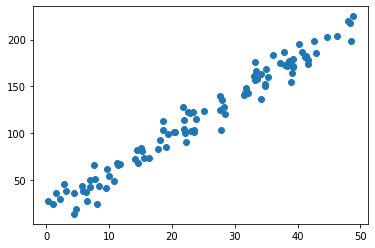

In [29]:
# Easiest way is to just plot the scatter

plt.scatter(x, y)
plt.show()

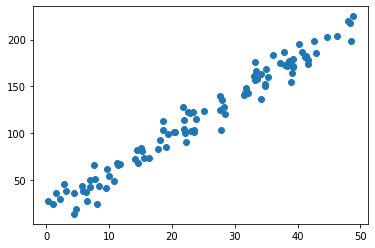

In [30]:
# or use the dataframe

plt.scatter(df.x, df.y); # using the semicolon ";" saves one row of code

## 5 Performing a linear regression

We set up a simple linear regression model that uses the mockdata to estimate the parameters $m$ and $b$ of the linear function $y = mx + b$. 

To do so:

1. Run the regression
2. Print some general info on the estimated paramters
3. Calculate the 95% confidence interval on the slope $m$ and intercept $b$ and print them out.

In [31]:
# 1. run the regression
lm = sps.linregress(x, y)

# 2. Print estimated parameters and true ones and the r-squared value
print(f"Regression result: y = {lm.slope:.1f} * x + {lm.intercept:.1f}") # print as floating point with 1 digit after the comma
print(f"True values:       y = 4.0 * x + 20.0\n")
print(f"r-squared:         {lm.rvalue:.6f}")
print(f"p-value:           {lm.pvalue:.6f} => {lm.pvalue:.6g}") 
# NOTE: .6f print 6 digits after the decimal, 
# .6g print also 6 digits but replaces the 6th scientific notation "e(+/-)number"

# 3. calculate 95% confidence, use two-sided Students t-distribution
#    p - probaility, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, dfr: abs(t.ppf(p/2, dfr))
ts = tinv(0.05, len(x)-2)

print(f"slope (95%):       {lm.slope:6f} +/- {ts*lm.stderr:.6f}")
print(f"intercept (95%):   {lm.intercept:6f} +/- {ts*lm.intercept_stderr:.6f}")



Regression result: y = 4.1 * x + 16.8
True values:       y = 4.0 * x + 20.0

r-squared:         0.983190
p-value:           0.000000 => 3.44012e-74
slope (95%):       4.079975 +/- 0.151887
intercept (95%):   16.792373 +/- 4.235277


**NOTE:** I use here the `:length.decimal(f or g)` notation. You can read about f-string formatting for numbers here 
https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python
and here http://cissandbox.bentley.edu/sandbox/wp-content/uploads/2022-02-10-Documentation-on-f-strings-Updated.pdf

In general, to format a number we can use:
- `:.3f` for to have 3 decimals after the "." (`3.14563:.3f = 3.146`)
- `:10.3f` will use in total 10 digits (incl. the ".") and have 3 digits after the "." (`3.14563:10.3f = '-----3.146'`). The dash "-" is to show that there is an empty space!


## 6 Make predictions

In order to make predictions, we do:

1. Define the extraploated x values starting from the maximal value in `x` rounded to the next integer until some number larger than that. For a meaningful line, we need only two points!
2. Define the estimated x range from 0 to `max(x)`.
3. Plot the scatter data
4. Plot the estimated line using our function `my_lin()` with the estimated parameters stored in `lm.slope` and `lm.intercept`. 
5. Plot the predicted values (no data points) using again our linear function `my_lin()` and the estimated parameters. 

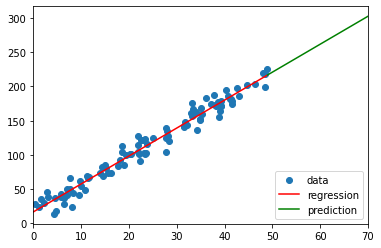

In [32]:
# create new x values to plot the linear model, we include 
# an extrapolating prediction.

EXTRAPOL = 70 
ext_points = [round(max(x)), EXTRAPOL] # x values for extrapolation
line_points = [0, max(x)] # x values to cover the range of random x data

# plot the data
plt.scatter(x, y, label="data")

# plot the regression result
plt.plot(line_points, my_lin(np.array(line_points), m=lm.slope, b=lm.intercept),
        color='red', label="regression")

# plot the extrapolation
plt.plot(ext_points, my_lin(np.array(ext_points), m=lm.slope, b=lm.intercept),
        color='green', label="prediction")

plt.xlim(0,EXTRAPOL) 
plt.legend(loc="lower right") # set a legend for info
plt.show()

## 7 Use `statsmodels` and `pandas` to make the linear regression

The `statsmodels` library is another way of handling statistical models. It has similar notations than R available.

We have been setting up already a dataframe with the mocking data of our system. 

We can use the `seaborn` package to get out-of-the-box statistical visualisations, e.g., the regression plot `regplot()`



In [33]:
import numpy as np # already imported but for completeness
import statsmodels.formula.api as sm
import seaborn as sns


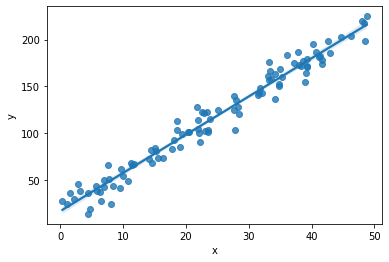

In [34]:
# visualise the regression with the dataframe using seaborn
sns.regplot(x="x", y="y", data=df);

### 7.1 Performing the regression with `statsmodels`

The `statsmodels` package has the possibility to use a textual formula like in R given in `statsmodels.formula.api`.

It has the **ordinary least squares** method to run a linear regression using pandas dataframe column names. 

I use also **command piping**, that is to add or glue together commands using the "." between them. You have used that before when e.g., accessing a column in a dataframe via `df.x`. 

In [35]:
# Perform linear regression
lm_sm = sm.ols("y ~ x", data=df).fit()

# Print out regresseion summary
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2842.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.44e-74
Time:                        22:45:51   Log-Likelihood:                -375.24
No. Observations:                 100   AIC:                             754.5
Df Residuals:                      98   BIC:                             759.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7924      2.134      7.868      0.0

Comparison to the result with `scipy.stats` reveals that we have very similar results in both methods.

In [36]:
print(f"slope (95%):       {lm.slope:6f} +/- {lm.stderr:.6f}")
print(f"intercept (95%):   {lm.intercept:6f} +/- {lm.intercept_stderr:.6f}")

slope (95%):       4.079975 +/- 0.076538
intercept (95%):   16.792373 +/- 2.134214


#### 7.1.1 Make the most compact version of running a linear regression

Here, we use the dataframe directly and apply the `pd.DataFrame.pipe()` method. 

The command `df.pipe((smf.ols, "data), "y ~ x)` is equal to `sm.ols("y ~ x", data=df)`. Then the `fit()` method and the `summary()` method are applied.

In [37]:
# super compact version to run a regression and get the output
print(
  df.pipe((sm.ols, "data"), "y ~ x")
  .fit()
  .summary()
)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2842.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.44e-74
Time:                        22:45:51   Log-Likelihood:                -375.24
No. Observations:                 100   AIC:                             754.5
Df Residuals:                      98   BIC:                             759.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7924      2.134      7.868      0.0

## 8 Some added info 

### 8.1 How random seed works

You can comment the seed out, or choose a different one and re-run the cell to see what happens.

In [38]:
SEED= 4567
s=np.random.seed(SEED)
print(s)
for i in range(3):
   rf=np.random.uniform(-1.0,1.0,(3,4))
   print(rf)

None
[[-0.27605655  0.96886752  0.73839317  0.39276403]
 [ 0.41498171  0.96610241 -0.48149069 -0.7232663 ]
 [-0.42772691 -0.47148216  0.65593654 -0.09396717]]
[[ 0.3603802   0.82503768 -0.69973715 -0.87240222]
 [-0.74306749 -0.82357634  0.59870579 -0.36147236]
 [-0.51533245  0.59891921  0.2136458   0.77879359]]
[[-0.68518534 -0.75853499 -0.58233372 -0.51183984]
 [ 0.18449675  0.76873815  0.64985307 -0.302572  ]
 [-0.4798142   0.14918558 -0.23632749  0.82577675]]


### 8.2 How the sample size affects on $\mu$ and $\sigma$  

You can change the `SAMPLE_SIZE` constant and see how the deviations are changeing.

In [52]:
rng2 = np.random.default_rng(43)
mu, sigma = 0, 10 
SAMPLE_SIZE = 100 # change to 1000, 10000000 and see what happens :)

# Sample from a normal distribution
aa = rng2.normal(mu, sigma, SAMPLE_SIZE)
print(f"deviation mu: {abs(mu - np.mean(aa))}, deviation sigma: {abs(sigma - np.std(aa, ddof=1))}")


deviation mu: 1.2613701303074256, deviation sigma: 0.4235134421785869


### 8.3 Visualise the random sampling from a normal distribution

You can also run this cell for different `SAMPLE_SIZE`'s and see how the distribution and the fit to it is changing.

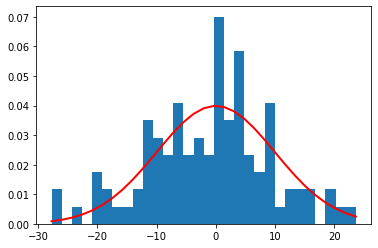

In [51]:
count, bins, ignored = plt.hist(aa, 30, density=True)
plt.plot(bins, 
         1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()